In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Scikit for evaluation metrics
#pip install -U scikit-learn

In [4]:
#!pip install nltk
#!pip install wordcloud

In [5]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#fetch the dataset
file_path=("/content/drive/MyDrive/IMDB Dataset.csv")
df=pd.read_csv(file_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
#EDA
#sentiment count:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Text(0.5, 1.0, 'Negative Reviews')

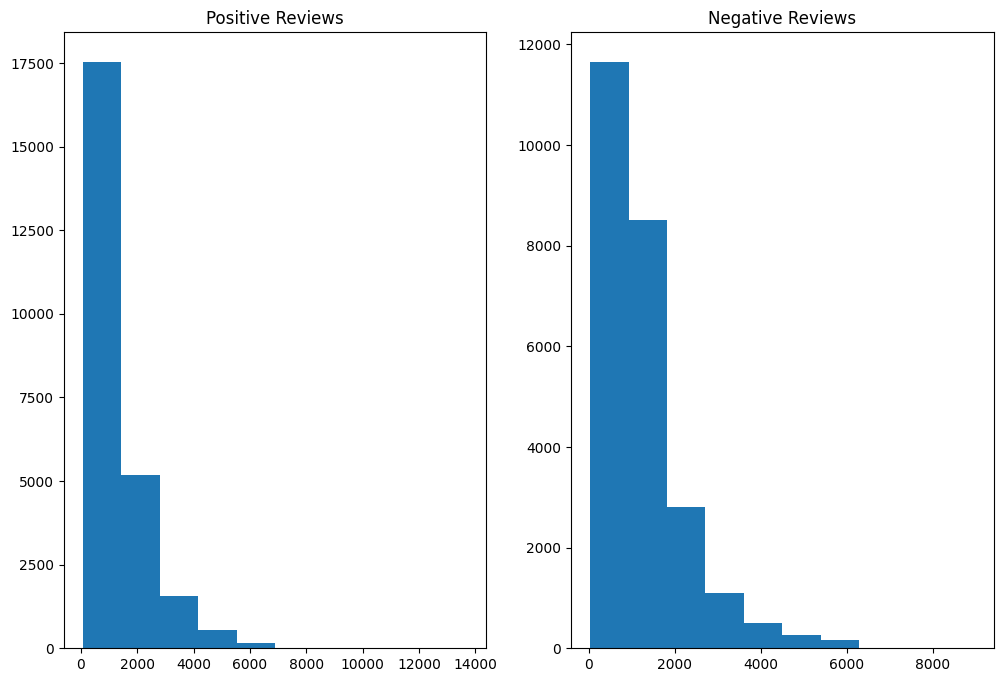

In [9]:
#summary of the reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

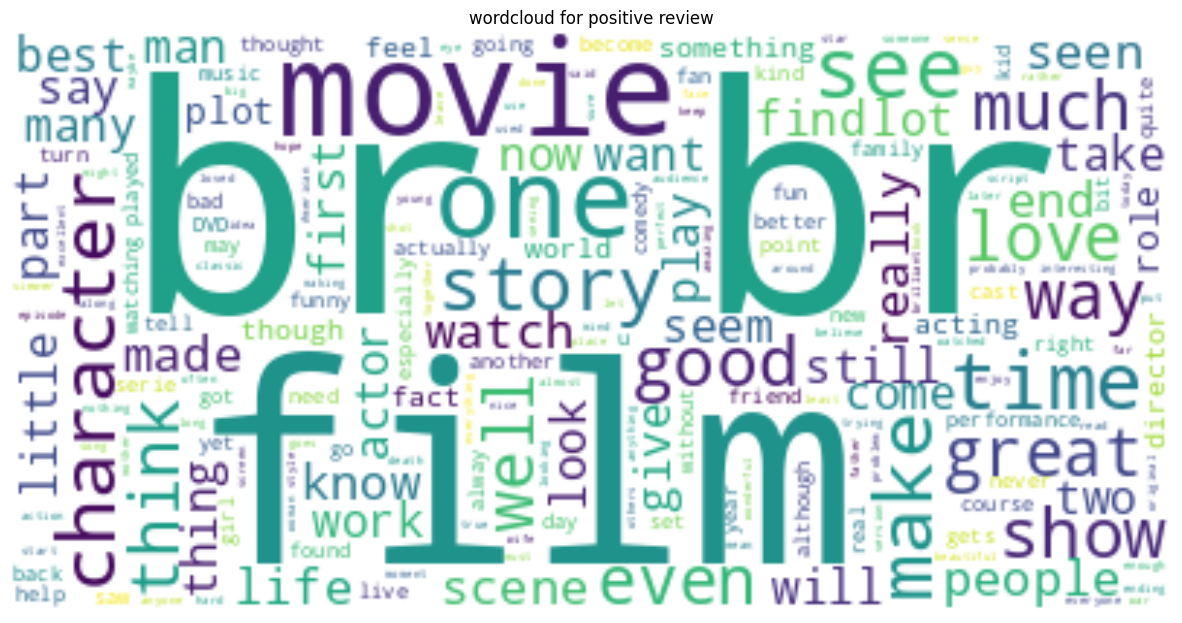

In [10]:
#word cloud graph. To show most used words in both classes
#positive class
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

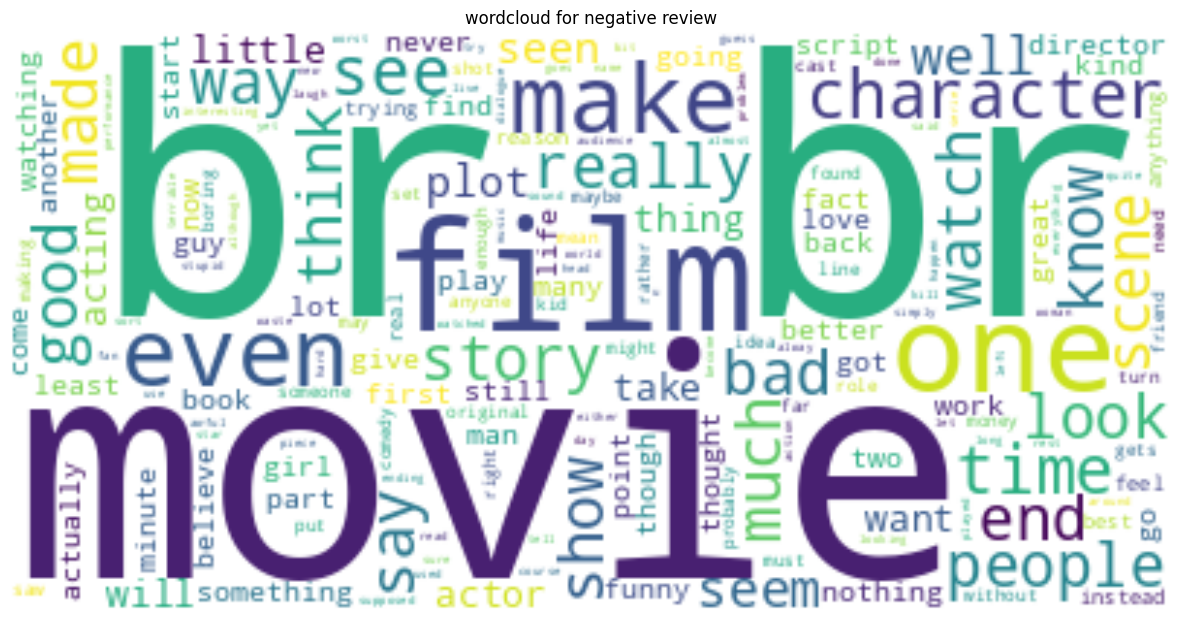

In [11]:
#Negative class
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [12]:
#Data preprocessing.
#Rename the review column.
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
#Text Cleaning for instance to remove stop words and short forms of words
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

dt = df['text'].apply(cleaning)

In [14]:
#Applying a transformation
dt = pd.DataFrame(dt)
dt['sentiment']=df['sentiment']
dt

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [15]:
# remove stop words:
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [16]:
#verify
dt

,text,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...
...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,disagree previous comment side maltin rate exc...


In [17]:
#Checking and working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,83576
1,film,74511
2,time,23298
3,story,22062
4,great,17723
5,movies,15447
6,made,15414
7,films,15294
8,make,15284
9,characters,14657


In [18]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,sentiment,no_sw,wo_stopfreq
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...


In [19]:
#we check some specific cells
dt['no_sw'].loc[5]
dt['wo_stopfreq'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

In [20]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...
...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...,job creative original expecting lotta fun dvd ...,job creative original expecting lotta fun dvd ...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...


In [21]:
#Done with data cleaning we move to naive bayes modelling
#Tokenization
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...
...,...,...
49995,1,job creative original expecting lotta fun dvd ...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,disagree previous comment side maltin rate exc...


In [22]:
#tokenize review
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [reviewers, mentioned, watching, oz, episode, ...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: review, dtype: object

In [23]:
#vectorize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [24]:
#Splitting to training and testing
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [25]:
#Naive Bayes Modelling
#Complement Naive Bayes Model
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 86.22%
------------------------------------------------
Confusion Matrix:
      0     1
0  4327   650
1   728  4295
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.86      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Interpret the result:

### Accuracy score: is 86.33 % for the complementNB model. for each of 100 total number of prediction, in average, our model can predict 86 cases correctly

The confusion matrix:

True Positive: The actual value was 4349 negative reviews and the model predicted 4349 negative reviews
True Negative: The actual value was 4284 positive reviews and the model predict 4248 negative reviews
False Positive: The actual values was 628 postive reviews and the model predicted 628 negative reviews
False Negative: The actual values was 739 negative reviews and the model preditced 739 positive reviews

Classification Report:

### Precision:

Negative review: the ratio correctly predicted negative review observations to the total predicted negative review observations is 0.85
Positive review: the ratio correctly predicted positive review observations to the total predicted positive review observations is 0.87

### Recall:

Negative review: the ratio of correctly predicted negative review observations to the all observations in actual class is 0.87
Positive review: the ratio of correctly predicted positive review observations to the all observations in actual class is 0.85

F1 Score is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are equal 0.86

In [26]:
#Mutilnominal NB model
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 86.21%
------------------------------------------------
Confusion Matrix:
      0     1
0  4327   650
1   729  4294
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [27]:
#Bernoulli NB model
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 83.75%
------------------------------------------------
Confusion Matrix:
      0     1
0  4403   574
1  1051  3972
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4977
           1       0.87      0.79      0.83      5023

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Confusion Matrices and The ROC Curves

In [29]:
#Plot confusion matrix for CNB, MNB, BNB model
'''
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k:
    plot_confusion_matrix(i, X_test, y_test)
    plt.title(i)
    plt.show()
'''

'\nfrom sklearn.metrics import plot_confusion_matrix\nimport warnings\nwarnings.filterwarnings("ignore")\nk= [CNB, MNB, BNB]\nfor i in k:\n    plot_confusion_matrix(i, X_test, y_test)\n    plt.title(i)\n    plt.show()\n'

0.9259366328191504 0.9259366328191505 0.9211782121309687


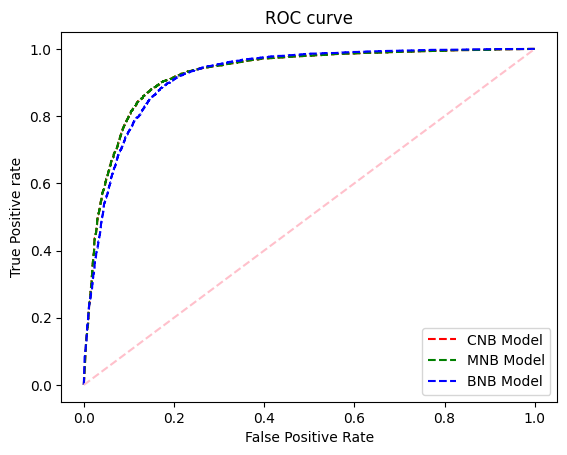

In [30]:
#ROC Curves
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();